## Classification using H2O Auto ML

#### Importing & Initializing H2O

In [2]:
import h2o

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from C:\Users\Biplab.Ghosal\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\BIPLAB~1.GHO\AppData\Local\Temp\tmpj8bwm_3p
  JVM stdout: C:\Users\BIPLAB~1.GHO\AppData\Local\Temp\tmpj8bwm_3p\h2o_Biplab_Ghosal_started_from_python.out
  JVM stderr: C:\Users\BIPLAB~1.GHO\AppData\Local\Temp\tmpj8bwm_3p\h2o_Biplab_Ghosal_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_Biplab_Ghosal_i8s0c1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.752 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
from h2o.automl import H2OAutoML

#### Loading the data

In [5]:
churn_df = h2o.import_file(path='churn_data.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059919,2283.3004408418656,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.55948102309446,,,,,,,,,,,,,30.090047097678493,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[0.7,0.15])
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No


In [8]:
y="Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

#### Defining the H2O parameters

In [9]:
aml = H2OAutoML(max_models=10,seed=10,exclude_algos=["DeepLearning"],verbosity="info",nfolds=5)

In [10]:
aml.train(x=x, y=y, training_frame=churn_train,validation_frame=churn_valid)

AutoML progress: |
12:19:20.391: Project: AutoML_20200605_121920391
12:19:20.399: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
12:19:20.402: Setting stopping tolerance adaptively based on the training frame: 0.01421338109037403
12:19:20.403: Build control seed: 10
12:19:20.404: training frame: Frame key: automl_training_py_2_sid_aeb1    cols: 21    rows: 4950  chunks: 32    size: 445463  checksum: 7401673260140578853
12:19:20.405: validation frame: Frame key: py_4_sid_aeb1    cols: 21    rows: 1075  chunks: 32    size: 318045  checksum: -1955423219070093906
12:19:20.405: leaderboard frame: NULL
12:19:20.405: blending frame: NULL
12:19:20.405: response column: Churn
12:19:20.405: fold column: null
12:19:20.405: weights column: null
12:19:20.457: AutoML: XGBoost is not available

#### Selecting the best model of all the trained models

In [11]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200605_121920,0.853076,0.413767,0.669488,0.230958,0.364998,0.133223
StackedEnsemble_BestOfFamily_AutoML_20200605_121920,0.852766,0.414251,0.666968,0.227767,0.365182,0.133358
GBM_5_AutoML_20200605_121920,0.850068,0.407925,0.665645,0.232513,0.364481,0.132846
GLM_1_AutoML_20200605_121920,0.849499,0.410088,0.652312,0.229115,0.365312,0.133453
GBM_grid__1_AutoML_20200605_121920_model_1,0.849336,0.408751,0.666588,0.23047,0.364611,0.132941
GBM_1_AutoML_20200605_121920,0.843094,0.417504,0.651084,0.242005,0.369078,0.136218
GBM_2_AutoML_20200605_121920,0.841468,0.420827,0.647114,0.248266,0.37,0.1369
GBM_3_AutoML_20200605_121920,0.835843,0.429414,0.636038,0.239146,0.374024,0.139894
GBM_grid__1_AutoML_20200605_121920_model_2,0.832199,0.43924,0.629402,0.247358,0.378439,0.143216
GBM_4_AutoML_20200605_121920,0.829885,0.441593,0.618856,0.244261,0.379487,0.144011


In [12]:
churn_pred = aml.leader.predict(churn_test)
churn_pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,No,Yes
No,0.865999,0.134001
No,0.877447,0.122553
Yes,0.328808,0.671192
No,0.942628,0.0573716
Yes,0.554914,0.445086
Yes,0.517906,0.482094
No,0.943147,0.0568528
No,0.946905,0.0530954
No,0.943486,0.0565136
Yes,0.647071,0.352929


In [13]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1353320969706672
RMSE: 0.3678751105615426
LogLoss: 0.4218060125596241
Null degrees of freedom: 1017
Residual degrees of freedom: 1013
Null deviance: 1169.5030470468935
Residual deviance: 858.7970415713946
AIC: 868.7970415713946
AUC: 0.8426226803711405
AUCPR: 0.6602487802472022
Gini: 0.685245360742281

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2338528495879835: 


,,No,Yes,Error,Rate
0,No,586.0,166.0,0.2207,(166.0/752.0)
1,Yes,68.0,198.0,0.2556,(68.0/266.0)
2,Total,654.0,364.0,0.2299,(234.0/1018.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.233853,0.628571,238.0
1,max f2,0.133741,0.762873,303.0
2,max f0point5,0.642254,0.652425,94.0
3,max accuracy,0.642254,0.813360,94.0
4,max precision,0.900073,1.000000,0.0
5,max recall,0.052586,1.000000,398.0
6,max specificity,0.900073,1.000000,0.0
7,max absolute_mcc,0.398816,0.485337,179.0
8,max min_per_class_accuracy,0.220426,0.759398,247.0
9,max mean_per_class_accuracy,0.149914,0.773626,292.0



Gains/Lift Table: Avg response rate: 26.13 %, avg score: 26.20 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010806,0.873192,3.479152,3.479152,0.909091,0.881692,0.909091,0.881692,0.037594,0.037594,247.915243,247.915243
1,,2,0.020629,0.850460,3.061654,3.280344,0.800000,0.861395,0.857143,0.872027,0.030075,0.067669,206.165414,228.034372
2,,3,0.031434,0.833682,3.131237,3.229088,0.818182,0.840308,0.843750,0.861123,0.033835,0.101504,213.123718,222.908835
3,,4,0.040275,0.818358,3.401838,3.267009,0.888889,0.822923,0.853659,0.852738,0.030075,0.131579,240.183793,226.700899
4,,5,0.050098,0.804855,3.061654,3.226743,0.800000,0.812156,0.843137,0.844781,0.030075,0.161654,206.165414,222.674333
5,,6,0.100196,0.709453,2.701460,2.964101,0.705882,0.755418,0.774510,0.800100,0.135338,0.296992,170.145953,196.410143
6,,7,0.150295,0.626333,2.626419,2.851541,0.686275,0.673627,0.745098,0.757942,0.131579,0.428571,162.641899,185.154062
7,,8,0.200393,0.521723,1.725932,2.570139,0.450980,0.570230,0.671569,0.711014,0.086466,0.515038,72.593248,157.013858
8,,9,0.300589,0.309534,1.463291,2.201189,0.382353,0.420178,0.575163,0.614069,0.146617,0.661654,46.329058,120.118925
9,,10,0.399804,0.195797,1.212536,1.955848,0.316832,0.241904,0.511057,0.521713,0.120301,0.781955,21.253629,95.584785


In [14]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_AutoML_20200605_121920',
 'StackedEnsemble_BestOfFamily_AutoML_20200605_121920',
 'GBM_5_AutoML_20200605_121920',
 'GLM_1_AutoML_20200605_121920',
 'GBM_grid__1_AutoML_20200605_121920_model_1',
 'GBM_1_AutoML_20200605_121920',
 'GBM_2_AutoML_20200605_121920',
 'GBM_3_AutoML_20200605_121920',
 'GBM_grid__1_AutoML_20200605_121920_model_2',
 'GBM_4_AutoML_20200605_121920',
 'DRF_1_AutoML_20200605_121920',
 'XRT_1_AutoML_20200605_121920']

#### Checking a custom model (RF)

In [15]:
out = h2o.get_model([mid for mid in model_ids if 'DRF' in mid][0])
out

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20200605_121920


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,523050.0,19.0,20.0,19.92,745.0,875.0,825.26




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1467008331047449
RMSE: 0.38301544760589606
LogLoss: 0.6297021688457916
Mean Per-Class Error: 0.2571512249799637
AUC: 0.8175439506486776
AUCPR: 0.604269033267884
Gini: 0.6350879012973552

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.302943909167279: 


,,No,Yes,Error,Rate
0,No,2757.0,894.0,0.2449,(894.0/3651.0)
1,Yes,350.0,949.0,0.2694,(350.0/1299.0)
2,Total,3107.0,1843.0,0.2513,(1244.0/4950.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.302944,0.604074,251.0
1,max f2,0.127232,0.731859,328.0
2,max f0point5,0.518550,0.585841,162.0
3,max accuracy,0.578733,0.786869,137.0
4,max precision,0.994050,0.900000,1.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.999726,0.0
7,max absolute_mcc,0.302944,0.442021,251.0
8,max min_per_class_accuracy,0.291843,0.741441,256.0
9,max mean_per_class_accuracy,0.302944,0.742849,251.0



Gains/Lift Table: Avg response rate: 26.24 %, avg score: 27.01 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010101,0.966667,3.048499,3.048499,0.800000,0.982922,0.800000,0.982922,0.030793,0.030793,204.849885,204.849885
1,,2,0.020000,0.925415,3.110713,3.079292,0.816327,0.945545,0.808081,0.964422,0.030793,0.061586,211.071311,207.929176
2,,3,0.030101,0.884437,3.048499,3.068959,0.800000,0.902515,0.805369,0.943648,0.030793,0.092379,204.849885,206.895857
3,,4,0.040000,0.859157,2.877410,3.021555,0.755102,0.871234,0.792929,0.925727,0.028483,0.120862,187.740962,202.155504
4,,5,0.050101,0.825181,3.048499,3.026987,0.800000,0.841453,0.794355,0.908737,0.030793,0.151655,204.849885,202.698726
5,,6,0.100000,0.702878,2.360427,2.694380,0.619433,0.761243,0.707071,0.835139,0.117783,0.269438,136.042674,169.438029
6,,7,0.150101,0.605570,2.135793,2.507934,0.560484,0.651960,0.658143,0.773997,0.107005,0.376443,113.579304,150.793394
7,,8,0.200000,0.518860,1.943881,2.367206,0.510121,0.560996,0.621212,0.720854,0.096998,0.473441,94.388084,136.720554
8,,9,0.300000,0.384631,1.616628,2.117013,0.424242,0.451504,0.555556,0.631071,0.161663,0.635104,61.662818,111.701309
9,,10,0.400202,0.277778,1.221551,1.892808,0.320565,0.327849,0.496719,0.555151,0.122402,0.757506,22.155070,89.280847




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.15153388225481765
RMSE: 0.3892735314079518
LogLoss: 0.49910839749681196
Mean Per-Class Error: 0.25407237695405827
AUC: 0.8148273772953786
AUCPR: 0.6244895756024055
Gini: 0.6296547545907571

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3521551981568336: 


,,No,Yes,Error,Rate
0,No,617.0,154.0,0.1997,(154.0/771.0)
1,Yes,97.0,207.0,0.3191,(97.0/304.0)
2,Total,714.0,361.0,0.2335,(251.0/1075.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.352155,0.622556,205.0
1,max f2,0.075714,0.739042,349.0
2,max f0point5,0.417976,0.612948,170.0
3,max accuracy,0.424630,0.781395,166.0
4,max precision,0.988067,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,0.988067,1.000000,0.0
7,max absolute_mcc,0.352155,0.458848,205.0
8,max min_per_class_accuracy,0.290000,0.743421,234.0
9,max mean_per_class_accuracy,0.251778,0.745928,254.0



Gains/Lift Table: Avg response rate: 28.28 %, avg score: 27.36 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010233,0.951139,2.571770,2.571770,0.727273,0.964322,0.727273,0.964322,0.026316,0.026316,157.177033,157.177033
1,,2,0.020465,0.910389,2.893242,2.732506,0.818182,0.931385,0.772727,0.947854,0.029605,0.055921,189.324163,173.250598
2,,3,0.030698,0.864237,3.214713,2.893242,0.909091,0.885324,0.818182,0.927010,0.032895,0.088816,221.471292,189.324163
3,,4,0.040000,0.817678,2.828947,2.878289,0.800000,0.843070,0.813953,0.907489,0.026316,0.115132,182.894737,187.828947
4,,5,0.050233,0.795515,2.571770,2.815850,0.727273,0.807195,0.796296,0.887059,0.026316,0.141447,157.177033,181.585039
5,,6,0.100465,0.681467,2.684881,2.750365,0.759259,0.733581,0.777778,0.810320,0.134868,0.276316,168.488060,175.036550
6,,7,0.150698,0.583267,1.833577,2.444769,0.518519,0.627888,0.691358,0.749509,0.092105,0.368421,83.357700,144.476933
7,,8,0.200000,0.508966,1.534571,2.220395,0.433962,0.545017,0.627907,0.699100,0.075658,0.444079,53.457051,122.039474
8,,9,0.300465,0.387956,1.833577,2.091056,0.518519,0.443191,0.591331,0.613533,0.184211,0.628289,83.357700,109.105630
9,,10,0.400000,0.284710,1.222793,1.875000,0.345794,0.332160,0.530233,0.543516,0.121711,0.750000,22.279267,87.500000




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.14261226963717083
RMSE: 0.3776403972526917
LogLoss: 0.4999734251579296
Mean Per-Class Error: 0.24900988877734787
AUC: 0.8269205669658455
AUCPR: 0.6183935647180074
Gini: 0.653841133931691

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29746716744369933: 


,,No,Yes,Error,Rate
0,No,2763.0,888.0,0.2432,(888.0/3651.0)
1,Yes,338.0,961.0,0.2602,(338.0/1299.0)
2,Total,3101.0,1849.0,0.2477,(1226.0/4950.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.297467,0.610546,252.0
1,max f2,0.144340,0.732440,325.0
2,max f0point5,0.489368,0.601328,172.0
3,max accuracy,0.494942,0.792525,169.0
4,max precision,0.963392,0.896552,6.0
5,max recall,0.000045,1.000000,399.0
6,max specificity,0.994446,0.999726,0.0
7,max absolute_mcc,0.382813,0.454171,217.0
8,max min_per_class_accuracy,0.289517,0.747498,256.0
9,max mean_per_class_accuracy,0.263396,0.750990,268.0



Gains/Lift Table: Avg response rate: 26.24 %, avg score: 26.95 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010101,0.944699,3.048499,3.048499,0.800000,0.966968,0.800000,0.966968,0.030793,0.030793,204.849885,204.849885
1,,2,0.020000,0.910104,2.955177,3.002309,0.775510,0.926282,0.787879,0.946830,0.029253,0.060046,195.517745,200.230947
2,,3,0.030101,0.883375,3.353349,3.120108,0.880000,0.896392,0.818792,0.929905,0.033872,0.093918,235.334873,212.010788
3,,4,0.040000,0.847224,3.421784,3.194765,0.897959,0.863494,0.838384,0.913470,0.033872,0.127791,242.178442,219.476520
4,,5,0.050101,0.811175,2.286374,3.011622,0.600000,0.827083,0.790323,0.896053,0.023095,0.150885,128.637413,201.162184
5,,6,0.100000,0.687382,2.545558,2.779061,0.668016,0.745306,0.729293,0.820832,0.127021,0.277906,154.555825,177.906082
6,,7,0.150101,0.585126,2.089697,2.548964,0.548387,0.634490,0.668910,0.758634,0.104696,0.382602,108.969679,154.896354
7,,8,0.200000,0.510056,2.036447,2.421093,0.534413,0.547188,0.635354,0.705879,0.101617,0.484219,103.644660,142.109315
8,,9,0.300000,0.382356,1.647421,2.163202,0.432323,0.443369,0.567677,0.618376,0.164742,0.648961,64.742109,116.320246
9,,10,0.400606,0.270000,1.201341,1.921646,0.315261,0.322811,0.504286,0.544149,0.120862,0.769823,20.134116,92.164577




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.76242423,0.008061847,0.7676768,0.7626263,0.75555557,0.77272725,0.75353533
1,auc,0.827359,0.011013909,0.82856554,0.83163637,0.83992493,0.80982906,0.8268392
2,aucpr,0.62030876,0.01958943,0.64361,0.6147166,0.6382263,0.60409224,0.6008986
3,err,0.23757575,0.008061847,0.23232323,0.23737374,0.24444444,0.22727273,0.24646464
4,err_count,235.2,7.981228,230.0,235.0,242.0,225.0,244.0
5,f0point5,0.565873,0.019978326,0.5681124,0.57110864,0.53944314,0.59386975,0.55683124
6,f1,0.61907375,0.010693703,0.6179402,0.63452566,0.6058632,0.6231156,0.613924
7,f2,0.68430483,0.021198774,0.67734885,0.7137859,0.6909361,0.6553911,0.68406206
8,lift_top_group,3.125048,0.29111183,3.081712,2.6450381,3.2459016,3.2518249,3.4007633
9,logloss,0.49997342,0.07711728,0.4293175,0.49849302,0.43874505,0.62211686,0.5111947



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-05 12:19:33,7.855 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-05 12:19:34,8.284 sec,5.0,0.459264,5.118735,0.715005,0.461281,2.030348,0.302555,0.412752,1.825413,0.771117,0.574525,2.631579,0.276279
2,,2020-06-05 12:19:34,8.479 sec,10.0,0.421381,2.764951,0.757213,0.518489,2.368766,0.277857,0.403269,1.167131,0.784659,0.591085,2.571770,0.254884
3,,2020-06-05 12:19:34,8.669 sec,15.0,0.404866,1.817428,0.780753,0.552262,2.591224,0.265521,0.395160,0.742137,0.802757,0.614555,3.241502,0.259535
4,,2020-06-05 12:19:34,8.880 sec,20.0,0.395181,1.299670,0.796558,0.569701,2.580110,0.268283,0.395574,0.660289,0.802199,0.610715,2.893242,0.246512
5,,2020-06-05 12:19:34,9.085 sec,25.0,0.390415,0.978898,0.805345,0.585117,2.784686,0.275758,0.393047,0.537696,0.808701,0.619985,2.893242,0.232558
6,,2020-06-05 12:19:35,9.319 sec,30.0,0.387004,0.831586,0.811571,0.592781,2.972286,0.255152,0.391586,0.535211,0.810930,0.625872,2.893242,0.240930
7,,2020-06-05 12:19:35,9.513 sec,35.0,0.386071,0.761004,0.812517,0.593484,2.819861,0.249899,0.390258,0.532145,0.812195,0.628919,2.893242,0.236279
8,,2020-06-05 12:19:35,9.693 sec,40.0,0.384941,0.708249,0.814449,0.597286,3.048499,0.235758,0.389477,0.499523,0.814017,0.629121,2.571770,0.234419
9,,2020-06-05 12:19:35,10.065 sec,45.0,0.383920,0.668988,0.815948,0.601030,2.972286,0.246667,0.389106,0.498033,0.815175,0.629192,2.571770,0.258605



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,4582.868164,1.000000,0.154828
1,TotalCharges,4011.158936,0.875251,0.135513
2,MonthlyCharges,3755.214844,0.819403,0.126867
3,Contract,3557.499023,0.776260,0.120187
4,PaymentMethod,1867.963257,0.407597,0.063107
5,OnlineSecurity,1748.392212,0.381506,0.059068
6,TechSupport,1697.180786,0.370332,0.057338
7,InternetService,1276.365601,0.278508,0.043121
8,gender,842.724976,0.183886,0.028471
9,Partner,762.361389,0.166350,0.025756


In [16]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.302943909167279: 


,,No,Yes,Error,Rate
0,No,2757.0,894.0,0.2449,(894.0/3651.0)
1,Yes,350.0,949.0,0.2694,(350.0/1299.0)
2,Total,3107.0,1843.0,0.2513,(1244.0/4950.0)


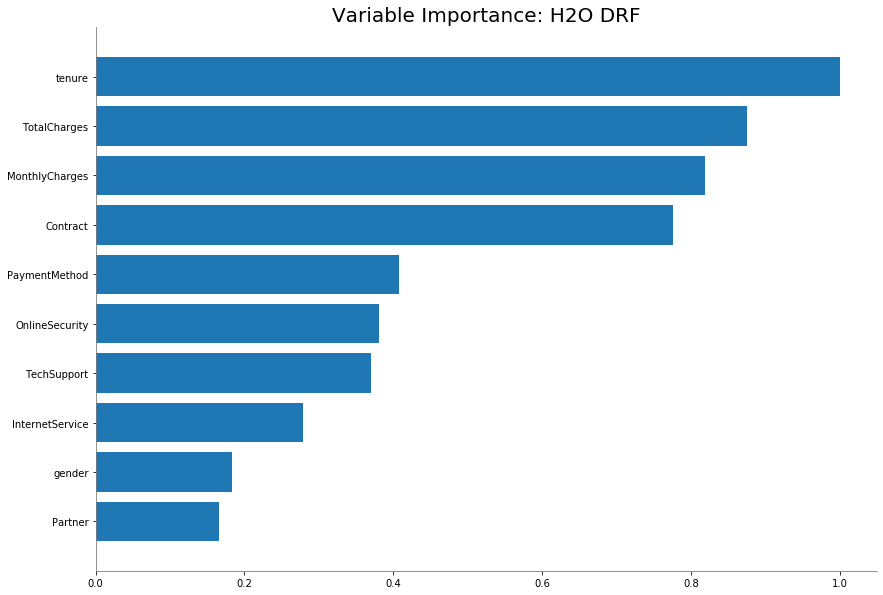

In [18]:
out.varimp_plot() # Variable Importance Plot of RF model

#### Saving the model

In [19]:
aml.leader.download_mojo(path="./")

'C:\\Biplab.Ghosal\\AutoML\\h20\\StackedEnsemble_AllModels_AutoML_20200605_121920.zip'